# Choosing an estimator for a classification problem

In [1]:
#### Import
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

heart_disease = pd.read_csv('DATA/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##### Consulting the map and it says to try linear SVC

map link https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

##  Set X and Y

In [2]:
X = heart_disease.iloc[:,0:-1]
y = heart_disease.iloc[:,-1]

In [3]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## Split the data

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(f'{X_train.shape}\n {X_test.shape}, \n{y_train.shape}')

(242, 13)
 (61, 13), 
(242,)


In [6]:
### Import the linearSVC estimator class
from sklearn.svm import LinearSVC

np.random.seed(42)

clf = LinearSVC(max_iter=10000)
clf.fit(X_train,y_train)

C:\Users\Sumit\anaconda3\envs\cv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=10000)

In [7]:
clf.score(X_test,y_test)

0.5245901639344263

In [8]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
Rclf = RandomForestClassifier(n_estimators=160)

# Fit the model to the data (training the machine learning model)
Rclf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
Rclf.score(X_test, y_test)

0.8688524590163934

In [9]:
import random
random.seed(42)
for i in range(10,200,10):
    print(f'value at {i} th index is')
    Rclf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'score is {Rclf.score(X_test,y_test)}')

value at 10 th index is
score is 0.8524590163934426
value at 20 th index is
score is 0.8524590163934426
value at 30 th index is
score is 0.8524590163934426
value at 40 th index is
score is 0.8524590163934426
value at 50 th index is
score is 0.8524590163934426
value at 60 th index is
score is 0.8360655737704918
value at 70 th index is
score is 0.8360655737704918
value at 80 th index is
score is 0.8688524590163934
value at 90 th index is
score is 0.8688524590163934
value at 100 th index is
score is 0.8688524590163934
value at 110 th index is
score is 0.8360655737704918
value at 120 th index is
score is 0.8524590163934426
value at 130 th index is
score is 0.8852459016393442
value at 140 th index is
score is 0.8688524590163934
value at 150 th index is
score is 0.8852459016393442
value at 160 th index is
score is 0.8360655737704918
value at 170 th index is
score is 0.8524590163934426
value at 180 th index is
score is 0.8360655737704918
value at 190 th index is
score is 0.8688524590163934


In [10]:
# Predict
predictions = Rclf.predict(X_test)
predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [11]:
predictions2 = clf.predict(X_test)
predictions2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [12]:
from sklearn.metrics import confusion_matrix,classification_report
cf = confusion_matrix(predictions,y_test)
cf

array([[24,  3],
       [ 5, 29]], dtype=int64)

In [63]:
cf2 = confusion_matrix(predictions2,y_test)
cf2

array([[29, 29],
       [ 0,  3]], dtype=int64)

In [14]:
cr = classification_report(predictions,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [15]:
cr2 = classification_report(predictions2,y_test)
print(cr2)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        58
           1       0.09      1.00      0.17         3

    accuracy                           0.52        61
   macro avg       0.55      0.75      0.42        61
weighted avg       0.96      0.52      0.64        61



## Making predictions with predict_proba()

In [16]:
#predict_proba() returns probabilities of a classification label
Rclf.predict_proba(X_test[:5])

array([[0.90526316, 0.09473684],
       [0.38421053, 0.61578947],
       [0.48421053, 0.51578947],
       [0.92631579, 0.07368421],
       [0.23684211, 0.76315789]])

In [17]:
Rclf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`value on left is greater than right . It is 0`

`value on right is greater than left . It is 1`

`1st sample has 0.875 probability of being zero`

`2nd sample has 0.4375 probability of being zero and 0.5625 probability o being 1`

## Evaluating a model usinng scoring parameter(cross validationn)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
clf.score(X_test,y_test)

0.8524590163934426

In [24]:
cross_val_score(clf,X,y,cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [25]:
np.random.seed(42)

#Single training annd test split score
clf_single_score = clf.score(X_test,y_test)

#Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5))

# compare the two
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

## 4.2.1 Classification model evaluation metrics

 * 1. Accuracy
 * 2. Area under ROC curve
 * 3. Confusion matrix
 * 4. Classification report

## Accuracy

In [29]:
print(f'Heart Disease Classifier `Cross-Validation Accuracy:{np.mean(clf_cross_val_score)*100:.2f}%')

Heart Disease Classifier Cross-Validation Accuracy:82.48%


### Area Under ROC curve
`Reciever Operating Characteristics Curve`


In [40]:
from sklearn.metrics import roc_curve

#Make predictions with probabilities
y_probs = Rclf.predict_proba(X_test)

y_probs[:10]

array([[0.90526316, 0.09473684],
       [0.38421053, 0.61578947],
       [0.48421053, 0.51578947],
       [0.92631579, 0.07368421],
       [0.23684211, 0.76315789],
       [0.18947368, 0.81052632],
       [0.22631579, 0.77368421],
       [0.95263158, 0.04736842],
       [0.97894737, 0.02105263],
       [0.48947368, 0.51052632]])

In [41]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.09473684, 0.61578947, 0.51578947, 0.07368421, 0.76315789,
       0.81052632, 0.77368421, 0.04736842, 0.02105263, 0.51052632])

In [43]:
# Calculate fpr,tpr, and threshoolds
#fpr = false positive rate
#tpr = True positive rate
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

# check the false postive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.06896552, 0.06896552, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
       0.34482759, 0.4137931 , 0.48275862, 0.55172414, 0.62068966,
       0.68965517, 0.75862069, 1.        ])

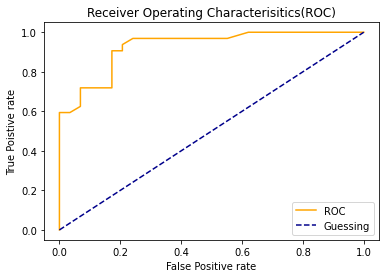

In [51]:
# Create a function for plottinng ROC curves
def plot_roc(false_p_rate,true_p_rate):
    '''Plots a ROC curve given the fpr
    and tpr'''
    
    #plot roc curve
    plt.plot(fpr,tpr,color='orange',label='ROC')
    #plot line with no predictive power(baseline)
    plt.plot([0,1],[0,1],color ='darkblue',linestyle='--',label='Guessing')
    
    #Customise the plot
    plt.xlabel("False Positive rate")
    plt.ylabel("True Poistive rate")
    plt.title("Receiver Operating Characterisitics(ROC)")
    plt.legend()
    plt.show()
    
plot_roc(fpr,tpr)

In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.927801724137931

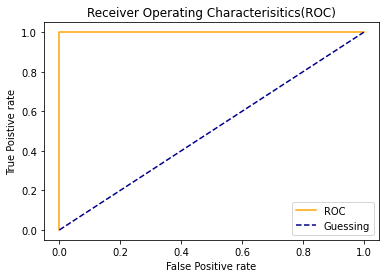

In [53]:
# Plot perfect ROC curve and AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc(fpr,tpr)

## Cnfusion Matrix

In [69]:
conf_mat = confusion_matrix(predictions,y_test)
conf_mat

array([[24,  3],
       [ 5, 29]], dtype=int64)

In [66]:
pd.crosstab(predictions,y_test,rownames=['Actual Labels'],colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,24,3
1,5,29


<AxesSubplot:>

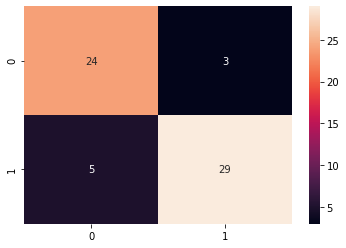

In [68]:
sns.heatmap(confusion_matrix(predictions,y_test),annot=True)

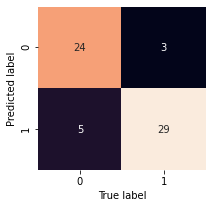

In [70]:
def plot_conf_mat(conf_mat):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # Fix the
    
plot_conf_mat(conf_mat)

In [ ]:
! git add Choosing_model_Classification.ipynb
! git commit -m "15:20/04-07-2021"
! git push origin main